# Refactory - Example Notebook

This notebook is used to verify the proper importation and working of the methods from our library.

# Data Preparation

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, KFold, StratifiedKFold, LeaveOneOut, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV, LogisticRegressionCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.utils import shuffle
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import warnings

In [136]:
warnings.filterwarnings("ignore")

In [3]:
def read_csv(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Return the DataFrame
    return df

# Usage example
df = read_csv('car_price.csv')
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [1]:
import used_car_prediction_lib.data_read.reader as rd

reader = rd.CSVReader()
df = reader.read('car_price.csv')
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


# Data Cleaning

In [138]:
# Function that drops columns
def drop_columns(dataframe, columns_to_drop):

    # If a single column name is provided, convert it to a list
    if isinstance(columns_to_drop, str):
        columns_to_drop = [columns_to_drop]

    # Drop the specified columns
    modified_dataframe = dataframe.drop(columns=columns_to_drop, axis=1)

    return modified_dataframe

#example
df = drop_columns(df, ['Unnamed: 0'])
df.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [2]:
import used_car_prediction_lib.data_process.deleteProcessor  as dp

#example
dropProcessor = dp.DropDeleteProcessor()
df = dropProcessor.delete(df, ['Unnamed: 0'])
df.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [139]:
# Function that detects missing values per columns
def detect_missing_values(dataframe):

    # Get the total number of missing values in the dataframe
    missing_values = dataframe.isnull().sum()

    # Return the number of missing values
    return missing_values

#example
detect_missing_values(df)

car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

In [3]:
import used_car_prediction_lib.data_exploration.dataExplorer as dataExp

detectMissingValue_dataExp = dataExp.MissingValuesDataExplorer()
#example
detectMissingValue_dataExp.check(df)

car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

In [140]:
#Function that converts column with strings to numerical values only
def convert_comma_to_dot(column):
    try:
        # Replace commas with periods
        column = column.replace(',', '.')

        return column
    except AttributeError:
        return None
    
def convert_price(column):
    num_value = float(column.split(" ")[0])

    if 'Crore' in column:
        return num_value * 10000000
    elif 'Lakh' in column:
        return num_value * 100000
    else:
        return num_value

# Remove the string in the engine column
def convert_engine(column):
    try:
        num_value = float(column.split(" ")[0])
        return num_value
    except ValueError:
        return None

# Remove the string in the power kms_driven
def convert_kms(column):
    try:
        # Remove commas and 'kms', then convert to integer
        return int(column.replace(',', '').replace(' kms', ''))
    except ValueError:
        return None
    
# Remove the string in the Seats column
def convert_seats(seats_str):
    try:
        return int(seats_str.replace(' Seats', ''))
    except ValueError:
        return None
    
# Extract the first word
def keep_first_word(input_string):
    all_words = input_string.split()
    if all_words:
        return all_words[0]
    else:
        return None

# Remove the string in the ownership column
def extract_first_integer(ownership_str):
    try:
        return int(''.join(filter(str.isdigit, ownership_str)))
    except ValueError:
        return None
    
def process_ownership(df):
    # Create a new column 'num_users' by applying the extract_first_integer function
    df['num_owners'] = df['ownership'].apply(extract_first_integer)

    # Drop the original 'ownership' column
    df.drop(columns=['ownership'], inplace=True)

    return df

# Apply the conversion function to the 'price' column
df['car_prices_in_rupee'] = df['car_prices_in_rupee'].apply(convert_comma_to_dot)
df['car_prices_in_rupee'] = df['car_prices_in_rupee'].apply(convert_price)

# Apply the conversion function to the 'kms_driven' column
df['kms_driven'] = df['kms_driven'].apply(convert_kms)

# Apply the conversion function to the 'engine' column
df['engine'] = df['engine'].apply(convert_engine)

# Apply the conversion function to the 'seats' column
df['Seats'] = df['Seats'].apply(convert_seats)

# Keep the first word of the column car
df['car_name'] = df['car_name'].apply(keep_first_word)

# Call the preprocess_data function to handle the ownership column
df = process_ownership(df)

# Display the modified DataFrame
df.head(20)

#example
#detect_missing_values(df)
        


,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,manufacture,engine,Seats,num_owners
0,Jeep,1003000.0,86226,Diesel,Manual,2017,1956.0,5,1
1,Renault,1283000.0,13248,Petrol,Automatic,2021,1330.0,5,1
2,Toyota,1640000.0,60343,Petrol,Automatic,2016,2494.0,5,1
3,Honda,777000.0,26696,Petrol,Automatic,2018,1199.0,5,1
4,Volkswagen,515000.0,69414,Petrol,Manual,2016,1199.0,5,1
5,Volkswagen,766000.0,49719,Petrol,Automatic,2017,1197.0,5,1
6,Volkswagen,758000.0,43688,Petrol,Automatic,2017,1197.0,5,1
7,Honda,1160000.0,14470,Diesel,Manual,2021,1498.0,5,1
8,Honda,699000.0,21429,Petrol,Automatic,2015,1497.0,5,1
9,Renault,753000.0,31750,Petrol,Automatic,2017,1498.0,5,1


In [4]:
import used_car_prediction_lib.features.convertor as cnvrt
# Apply the conversion function to the 'price' column
priceUnit_cnvrt = cnvrt.PriceUnitConvertor()
df['car_prices_in_rupee'] = df['car_prices_in_rupee'].apply(priceUnit_cnvrt .convert_comma_to_dot)
df['car_prices_in_rupee'] = df['car_prices_in_rupee'].apply(priceUnit_cnvrt.convert_price)

# Apply the conversion function to the 'kms_driven' column
string_cnvrt = cnvrt.StringConvertor()
df['kms_driven'] = df['kms_driven'].apply(string_cnvrt.convert_kms)

# Apply the conversion function to the 'engine' column
df['engine'] = df['engine'].apply(string_cnvrt.convert_engine)

# Apply the conversion function to the 'seats' column
df['Seats'] = df['Seats'].apply(string_cnvrt.convert_seats)

# Keep the first word of the column car
df['car_name'] = df['car_name'].apply(string_cnvrt.keep_first_word)


ownerShip_cnvrt = cnvrt.OwnershipConvertor()
# Call the preprocess_data function to handle the ownership column
df = ownerShip_cnvrt.process_ownership(df)

# Display the modified DataFrame
df.head(20)

#example
#detect_missing_values(df)
        

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,manufacture,engine,Seats,num_owners
0,Jeep,1003000.0,86226,Diesel,Manual,2017,1956.0,5,1
1,Renault,1283000.0,13248,Petrol,Automatic,2021,1330.0,5,1
2,Toyota,1640000.0,60343,Petrol,Automatic,2016,2494.0,5,1
3,Honda,777000.0,26696,Petrol,Automatic,2018,1199.0,5,1
4,Volkswagen,515000.0,69414,Petrol,Manual,2016,1199.0,5,1
5,Volkswagen,766000.0,49719,Petrol,Automatic,2017,1197.0,5,1
6,Volkswagen,758000.0,43688,Petrol,Automatic,2017,1197.0,5,1
7,Honda,1160000.0,14470,Diesel,Manual,2021,1498.0,5,1
8,Honda,699000.0,21429,Petrol,Automatic,2015,1497.0,5,1
9,Renault,753000.0,31750,Petrol,Automatic,2017,1498.0,5,1


In [141]:
'''# Correlation Matrix
def correlation_heatmap(df, columns):
    corr = df[columns].corr()
    plt.figure(figsize=(10, 8))
    heatmap = sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f")
    heatmap.set_title('Correlation Matrix', fontdict={'fontsize': 18})
    plt.show()

# Example 
correlation_heatmap(df, ['car_prices_in_rupee', 'kms_driven','transmission','engine','manufacture','Seats','num_owners'])

#
all_columns = df.columns.tolist()  
correlation_heatmap(df, all_columns)
'''

'''# Correlation Matrix
# Example 
import used_car_prediction_lib.data_exploration.graphicsExplorer as grpExp

correlationMatrix_grpExp = grpExp.CorrelationMatrixGraphicsExplorer()
correlationMatrix_grpExp.plot(df, all_columns)
'''

'# Correlation Matrix\ndef correlation_heatmap(df, columns):\n    corr = df[columns].corr()\n    plt.figure(figsize=(10, 8))\n    heatmap = sns.heatmap(corr, annot=True, cmap=\'viridis\', fmt=".2f")\n    heatmap.set_title(\'Correlation Matrix\', fontdict={\'fontsize\': 18})\n    plt.show()\n\n# Example \ncorrelation_heatmap(df, [\'car_prices_in_rupee\', \'kms_driven\',\'transmission\',\'engine\',\'manufacture\',\'Seats\',\'num_owners\'])\n\n#\nall_columns = df.columns.tolist()  \ncorrelation_heatmap(df, all_columns)\n'

In [7]:
#example
detect_missing_values(df)

car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
manufacture            0
engine                 0
Seats                  0
num_owners             0
dtype: int64

In [5]:
detectMissingValue_dataExp.check(df)

car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
manufacture            0
engine                 0
Seats                  0
num_owners             0
dtype: int64

In [143]:
#function for binary variables where we specify the true and false values
def columns_binary(df, column_names: list, true_value, false_value):
    for column_name in column_names:
        df[column_name] = df[column_name].replace({true_value: 1, false_value: 0})
    return df

df = columns_binary(df, ['transmission'], 'Automatic', 'Manual')

df.head(20)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,manufacture,engine,Seats,num_owners
0,Jeep,1003000.0,86226,Diesel,0,2017,1956.0,5,1
1,Renault,1283000.0,13248,Petrol,1,2021,1330.0,5,1
2,Toyota,1640000.0,60343,Petrol,1,2016,2494.0,5,1
3,Honda,777000.0,26696,Petrol,1,2018,1199.0,5,1
4,Volkswagen,515000.0,69414,Petrol,0,2016,1199.0,5,1
5,Volkswagen,766000.0,49719,Petrol,1,2017,1197.0,5,1
6,Volkswagen,758000.0,43688,Petrol,1,2017,1197.0,5,1
7,Honda,1160000.0,14470,Diesel,0,2021,1498.0,5,1
8,Honda,699000.0,21429,Petrol,1,2015,1497.0,5,1
9,Renault,753000.0,31750,Petrol,1,2017,1498.0,5,1


In [6]:
import used_car_prediction_lib.features.encoder as ecod

binary_ecod = ecod.BinaryEncoder(true_value='Automatic', false_value='Manual')
df = binary_ecod.encode(df, ['transmission'])

df.head(20)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,manufacture,engine,Seats,num_owners
0,Jeep,1003000.0,86226,Diesel,0,2017,1956.0,5,1
1,Renault,1283000.0,13248,Petrol,1,2021,1330.0,5,1
2,Toyota,1640000.0,60343,Petrol,1,2016,2494.0,5,1
3,Honda,777000.0,26696,Petrol,1,2018,1199.0,5,1
4,Volkswagen,515000.0,69414,Petrol,0,2016,1199.0,5,1
5,Volkswagen,766000.0,49719,Petrol,1,2017,1197.0,5,1
6,Volkswagen,758000.0,43688,Petrol,1,2017,1197.0,5,1
7,Honda,1160000.0,14470,Diesel,0,2021,1498.0,5,1
8,Honda,699000.0,21429,Petrol,1,2015,1497.0,5,1
9,Renault,753000.0,31750,Petrol,1,2017,1498.0,5,1


In [144]:
#example
detect_missing_values(df)

car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
manufacture            0
engine                 0
Seats                  0
num_owners             0
dtype: int64

In [7]:
detectMissingValue_dataExp.check(df)

car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
manufacture            0
engine                 0
Seats                  0
num_owners             0
dtype: int64

In [145]:
'''def one_hot_encode(df, columns_to_encode):
    df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)
    return df_encoded

# Define the columns to one-hot encode
columns_to_encode = ['fuel_type', 'car_name']

# Apply the one_hot_encode function
df = one_hot_encode(df, columns_to_encode)

#prepared_df.head()
df.head(20)'''

def one_hot_encode(df, columns_to_encode):
    df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)
    
    # Convert Boolean columns to integers (0s and 1s)
    boolean_columns = df_encoded.select_dtypes(include='bool').columns
    df_encoded[boolean_columns] = df_encoded[boolean_columns].astype(int)
    
    return df_encoded

# Define the columns to one-hot encode
columns_to_encode = ['fuel_type', 'car_name']

# Apply the one_hot_encode function
df = one_hot_encode(df, columns_to_encode)

df.head(20)  # Display the first 20 rows of the encoded DataFrame

,car_prices_in_rupee,kms_driven,transmission,manufacture,engine,Seats,num_owners,fuel_type_Diesel,fuel_type_Electric,fuel_type_Lpg,...,car_name_Mitsubishi,car_name_Nissan,car_name_Porsche,car_name_Premier,car_name_Renault,car_name_Skoda,car_name_Tata,car_name_Toyota,car_name_Volkswagen,car_name_Volvo
0,1003000.0,86226,0,2017,1956.0,5,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1283000.0,13248,1,2021,1330.0,5,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1640000.0,60343,1,2016,2494.0,5,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,777000.0,26696,1,2018,1199.0,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,515000.0,69414,0,2016,1199.0,5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,766000.0,49719,1,2017,1197.0,5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,758000.0,43688,1,2017,1197.0,5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,1160000.0,14470,0,2021,1498.0,5,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,699000.0,21429,1,2015,1497.0,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,753000.0,31750,1,2017,1498.0,5,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
import used_car_prediction_lib.features.encoder as ecod

oneHot_ecod = ecod.OneHotEncoder()

# Define the columns to one-hot encode
columns_to_encode = ['fuel_type', 'car_name']

# Apply the one_hot_encode function
df = oneHot_ecod.encode(df, columns_to_encode)

df.head(20)  # Display the first 20 rows of the encoded DataFrame

,car_prices_in_rupee,kms_driven,transmission,manufacture,engine,Seats,num_owners,fuel_type_Diesel,fuel_type_Electric,fuel_type_Lpg,...,car_name_Mitsubishi,car_name_Nissan,car_name_Porsche,car_name_Premier,car_name_Renault,car_name_Skoda,car_name_Tata,car_name_Toyota,car_name_Volkswagen,car_name_Volvo
0,1003000.0,86226,0,2017,1956.0,5,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1283000.0,13248,1,2021,1330.0,5,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1640000.0,60343,1,2016,2494.0,5,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,777000.0,26696,1,2018,1199.0,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,515000.0,69414,0,2016,1199.0,5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,766000.0,49719,1,2017,1197.0,5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,758000.0,43688,1,2017,1197.0,5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,1160000.0,14470,0,2021,1498.0,5,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,699000.0,21429,1,2015,1497.0,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,753000.0,31750,1,2017,1498.0,5,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [146]:
#example
detect_missing_values(df)

car_prices_in_rupee       0
kms_driven                0
transmission              0
manufacture               0
engine                    0
Seats                     0
num_owners                0
fuel_type_Diesel          0
fuel_type_Electric        0
fuel_type_Lpg             0
fuel_type_Petrol          0
car_name_BMW              0
car_name_Bentley          0
car_name_Chevrolet        0
car_name_Datsun           0
car_name_Fiat             0
car_name_Force            0
car_name_Ford             0
car_name_Honda            0
car_name_Hyundai          0
car_name_Isuzu            0
car_name_Jaguar           0
car_name_Jeep             0
car_name_Kia              0
car_name_Land             0
car_name_Lexus            0
car_name_MG               0
car_name_Mahindra         0
car_name_Maruti           0
car_name_Maserati         0
car_name_Mercedes-Benz    0
car_name_Mini             0
car_name_Mitsubishi       0
car_name_Nissan           0
car_name_Porsche          0
car_name_Premier    

In [9]:
detectMissingValue_dataExp.check(df)

car_prices_in_rupee       0
kms_driven                0
transmission              0
manufacture               0
engine                    0
Seats                     0
num_owners                0
fuel_type_Diesel          0
fuel_type_Electric        0
fuel_type_Lpg             0
fuel_type_Petrol          0
car_name_BMW              0
car_name_Bentley          0
car_name_Chevrolet        0
car_name_Datsun           0
car_name_Fiat             0
car_name_Force            0
car_name_Ford             0
car_name_Honda            0
car_name_Hyundai          0
car_name_Isuzu            0
car_name_Jaguar           0
car_name_Jeep             0
car_name_Kia              0
car_name_Land             0
car_name_Lexus            0
car_name_MG               0
car_name_Mahindra         0
car_name_Maruti           0
car_name_Maserati         0
car_name_Mercedes-Benz    0
car_name_Mini             0
car_name_Mitsubishi       0
car_name_Nissan           0
car_name_Porsche          0
car_name_Premier    

In [147]:
# Function that replaces missing values 

# Function to fill missing values with the mean
def column_fill_mean(df, column_name:str):
    df[column_name].fillna(df[column_name].mean(), inplace=True)
    return df

# fill missing values by random from the distribution
def distributed_fill(df, column_name):
    distribution = df[column_name].dropna()
    missing_count = df[column_name].isnull().sum()
    random_samples = np.random.choice(distribution, missing_count)
    df.loc[df[column_name].isnull(), column_name] = random_samples
    return df

# fill missing values with KNN
def column_fill_KNN(df, column_name:str, neighbors=10):
    imputer = KNNImputer()
    imputed_data = imputer.fit_transform(df)
    df_temp = pd.DataFrame(imputed_data)
    df_temp.columns = df.columns
    df[column_name] = df_temp[column_name]
    return df



In [148]:
df.head()


,car_prices_in_rupee,kms_driven,transmission,manufacture,engine,Seats,num_owners,fuel_type_Diesel,fuel_type_Electric,fuel_type_Lpg,...,car_name_Mitsubishi,car_name_Nissan,car_name_Porsche,car_name_Premier,car_name_Renault,car_name_Skoda,car_name_Tata,car_name_Toyota,car_name_Volkswagen,car_name_Volvo
0,1003000.0,86226,0,2017,1956.0,5,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1283000.0,13248,1,2021,1330.0,5,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1640000.0,60343,1,2016,2494.0,5,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,777000.0,26696,1,2018,1199.0,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,515000.0,69414,0,2016,1199.0,5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
'''
import used_car_prediction_lib.data_process.fillProcessor as fi_prc

mean_fi_prc = fi_prc.MeanFillProcessor()
mean_fi_prc.fill(df,['colmn'])
mean_fi_prc.fill(df,'colmn')

distrbuted_fi_prc = fi_prc.DistributionFillProcessor()
distrbuted_fi_prc.fill(df,['colmn'])

knn_fi_prc = fi_prc.KNNFillProcessor()
knn_fi_prc.fill(df,['colmn'])
knn_fi_prc.handle_outliers_KNN(df,'colmn')
df.head()'''

"\nimport used_car_prediction_lib.data_process.fillProcessor as fi_prc\n\nmean_fi_prc = fi_prc.MeanFillProcessor()\nmean_fi_prc.fill(df,['colmn'])\nmean_fi_prc.fill(df,'colmn')\n\ndistrbuted_fi_prc = fi_prc.DistributionFillProcessor()\ndistrbuted_fi_prc.fill(df,['colmn'])\n\nknn_fi_prc = fi_prc.KNNFillProcessor()\nknn_fi_prc.fill(df,['colmn'])\nknn_fi_prc.handle_outliers_KNN(df,'colmn')\ndf.head()"

# Data Exploration (graph (correlation and density), outliers, normality test,...)

In [149]:
# Function to check outliers using quantiles
def check_outliers_quantiles(df):
    outliers = {}
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            q1 = df[column].quantile(0.10)
            q3 = df[column].quantile(0.90)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr

            outliers_count = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
            outliers[column] = outliers_count

    print("Outliers in each numeric column based on quantiles method:")
    for col, count in outliers.items():
        print(f"Column '{col}': {count} outliers")

    return outliers

# Example
outliers_dict = check_outliers_quantiles(df)

Outliers in each numeric column based on quantiles method:
Column 'car_prices_in_rupee': 132 outliers
Column 'kms_driven': 22 outliers
Column 'transmission': 0 outliers
Column 'manufacture': 0 outliers
Column 'engine': 41 outliers
Column 'Seats': 0 outliers
Column 'num_owners': 96 outliers
Column 'fuel_type_Diesel': 0 outliers
Column 'fuel_type_Electric': 14 outliers
Column 'fuel_type_Lpg': 28 outliers
Column 'fuel_type_Petrol': 0 outliers
Column 'car_name_BMW': 172 outliers
Column 'car_name_Bentley': 1 outliers
Column 'car_name_Chevrolet': 82 outliers
Column 'car_name_Datsun': 25 outliers
Column 'car_name_Fiat': 17 outliers
Column 'car_name_Force': 1 outliers
Column 'car_name_Ford': 168 outliers
Column 'car_name_Honda': 498 outliers
Column 'car_name_Hyundai': 0 outliers
Column 'car_name_Isuzu': 4 outliers
Column 'car_name_Jaguar': 30 outliers
Column 'car_name_Jeep': 49 outliers
Column 'car_name_Kia': 61 outliers
Column 'car_name_Land': 50 outliers
Column 'car_name_Lexus': 10 outliers


In [10]:
# Class to check outliers using quantiles

import used_car_prediction_lib.data_exploration.dataExplorer as dexp

# Example
outlier_dexp = dexp.OutliersDataExplorer()
outlier_dexp.check(df)

Outliers in each numeric column based on quantiles method:
Column 'car_prices_in_rupee': 132 outliers
Column 'kms_driven': 22 outliers
Column 'transmission': 0 outliers
Column 'manufacture': 0 outliers
Column 'engine': 41 outliers
Column 'Seats': 0 outliers
Column 'num_owners': 96 outliers
Column 'fuel_type_Diesel': 0 outliers
Column 'fuel_type_Electric': 14 outliers
Column 'fuel_type_Lpg': 28 outliers
Column 'fuel_type_Petrol': 0 outliers
Column 'car_name_BMW': 172 outliers
Column 'car_name_Bentley': 1 outliers
Column 'car_name_Chevrolet': 82 outliers
Column 'car_name_Datsun': 25 outliers
Column 'car_name_Fiat': 17 outliers
Column 'car_name_Force': 1 outliers
Column 'car_name_Ford': 168 outliers
Column 'car_name_Honda': 498 outliers
Column 'car_name_Hyundai': 0 outliers
Column 'car_name_Isuzu': 4 outliers
Column 'car_name_Jaguar': 30 outliers
Column 'car_name_Jeep': 49 outliers
Column 'car_name_Kia': 61 outliers
Column 'car_name_Land': 50 outliers
Column 'car_name_Lexus': 10 outliers


{'car_prices_in_rupee': 132,
 'kms_driven': 22,
 'transmission': 0,
 'manufacture': 0,
 'engine': 41,
 'Seats': 0,
 'num_owners': 96,
 'fuel_type_Diesel': 0,
 'fuel_type_Electric': 14,
 'fuel_type_Lpg': 28,
 'fuel_type_Petrol': 0,
 'car_name_BMW': 172,
 'car_name_Bentley': 1,
 'car_name_Chevrolet': 82,
 'car_name_Datsun': 25,
 'car_name_Fiat': 17,
 'car_name_Force': 1,
 'car_name_Ford': 168,
 'car_name_Honda': 498,
 'car_name_Hyundai': 0,
 'car_name_Isuzu': 4,
 'car_name_Jaguar': 30,
 'car_name_Jeep': 49,
 'car_name_Kia': 61,
 'car_name_Land': 50,
 'car_name_Lexus': 10,
 'car_name_MG': 62,
 'car_name_Mahindra': 315,
 'car_name_Maruti': 0,
 'car_name_Maserati': 5,
 'car_name_Mercedes-Benz': 283,
 'car_name_Mini': 14,
 'car_name_Mitsubishi': 8,
 'car_name_Nissan': 63,
 'car_name_Porsche': 10,
 'car_name_Premier': 1,
 'car_name_Renault': 170,
 'car_name_Skoda': 113,
 'car_name_Tata': 269,
 'car_name_Toyota': 263,
 'car_name_Volkswagen': 159,
 'car_name_Volvo': 31}

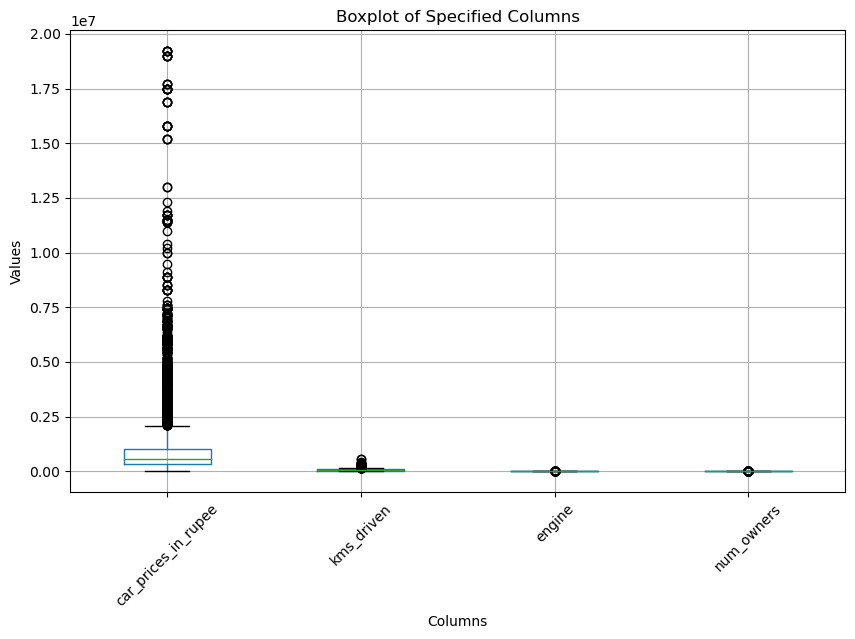

In [150]:
# Function to create boxplots for specified columns
def create_boxplots(df, columns):
    fig, ax = plt.subplots(figsize=(10, 6))
    df.boxplot(column=columns, ax=ax)
    plt.title('Boxplot of Specified Columns')
    plt.ylabel('Values')
    plt.xlabel('Columns')
    plt.xticks(rotation=45)
    plt.show()
    
# Assuming 'df' is your DataFrame and 'selected_columns' is the list of columns to plot
create_boxplots(df, ['car_prices_in_rupee', 'kms_driven', 'engine', 'num_owners'])

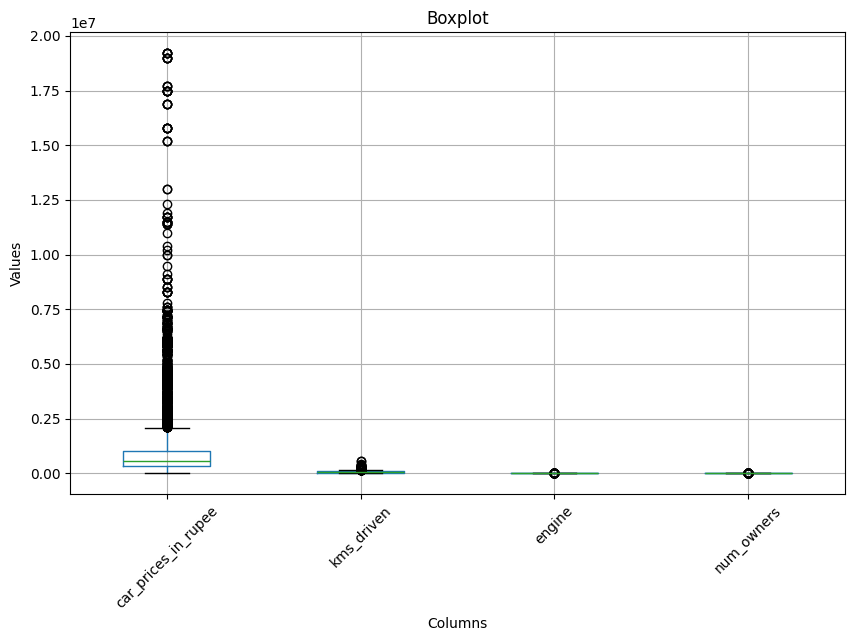

In [11]:
# Assuming 'df' is your DataFrame and 'selected_columns' is the list of columns to plot
import used_car_prediction_lib.data_exploration.graphicsExplorer as grpExp
boxplot_grpExp = grpExp.BoxPlotsGraphicsExplorer()
boxplot_grpExp.plot(df, ['car_prices_in_rupee', 'kms_driven', 'engine', 'num_owners'])

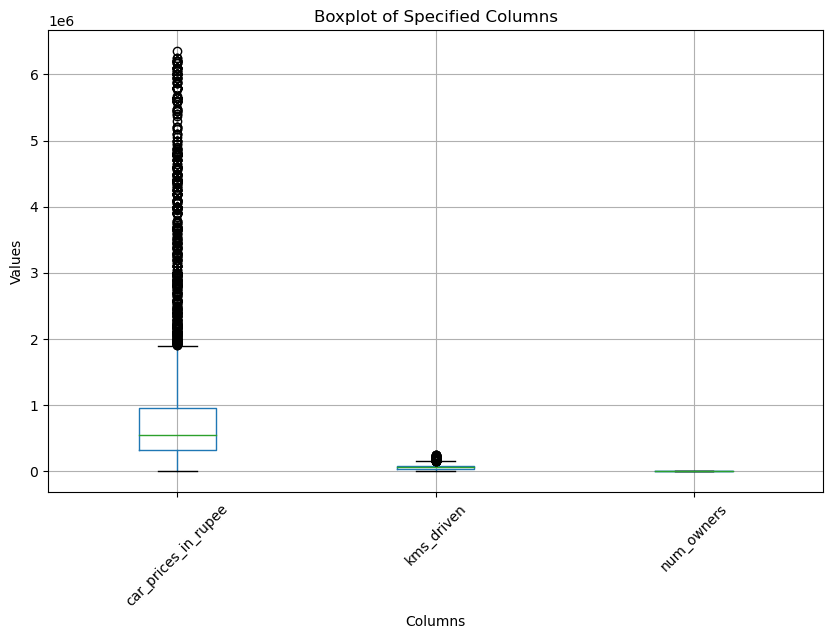

In [151]:
# Handle outliers -> replace values with KNN
def handle_outliers_KNN(df, column_name:str):
    df_copy = df.copy()
    column_data = df_copy[[column_name]].values
    Q1 = np.percentile(column_data, 10)
    Q3 = np.percentile(column_data, 90)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_copy[column_name] = np.where((column_data < lower_bound) | (column_data > upper_bound), np.nan, column_data)

    df_copy = column_fill_KNN(df_copy, column_name)
    return df_copy

# Handle outliers -> replace values with mean
def handle_outliers_mean(df, column_name:str):
    df_copy = df.copy()
    column_data = df_copy[[column_name]].values
    Q1 = np.percentile(column_data, 10)
    Q3 = np.percentile(column_data, 90)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_copy[column_name] = np.where((column_data < lower_bound) | (column_data > upper_bound), np.nan, column_data)
    df_copy[column_name].fillna(df_copy[column_name].mean(), inplace=True)
    return df_copy

#example
df = handle_outliers_mean(df, 'car_prices_in_rupee')
df = handle_outliers_mean(df, 'kms_driven')
df = handle_outliers_mean(df, 'num_owners')

create_boxplots(df, ['car_prices_in_rupee', 'kms_driven', 'num_owners'])


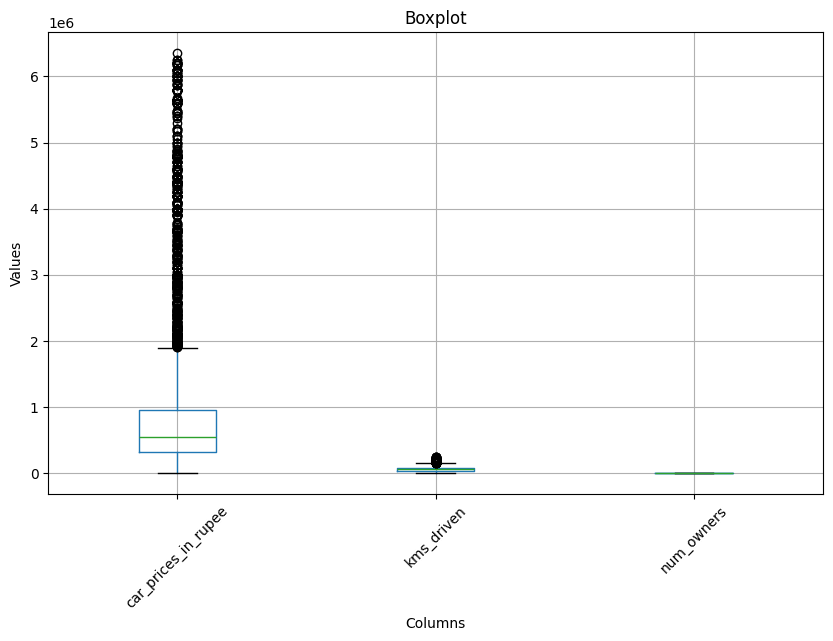

In [12]:
#example
import used_car_prediction_lib.data_process.fillProcessor as fillPrc
mean_fillPrc = fillPrc.MeanFillProcessor()
df = mean_fillPrc.handle_outliers_mean(df, 'car_prices_in_rupee')
df = mean_fillPrc.handle_outliers_mean(df, 'kms_driven')
df = mean_fillPrc.handle_outliers_mean(df, 'num_owners')

import used_car_prediction_lib.data_exploration.graphicsExplorer as grpExp
boxplot_grpExp = grpExp.BoxPlotsGraphicsExplorer()
boxplot_grpExp.plot(df, ['car_prices_in_rupee', 'kms_driven', 'num_owners'])

In [152]:
#Function to check the range of values in each column
def check_range(df):
    for column in df.select_dtypes(include=['int64', 'float64']).columns:
        min_val = df[column].min()
        max_val = df[column].max()
        print(f"{column}: Min = {min_val}, Max = {max_val}")


# Example 
ranges = check_range(df)


car_prices_in_rupee: Min = 35.0, Max = 6350000.0
kms_driven: Min = 250.0, Max = 249535.0
transmission: Min = 0, Max = 1
manufacture: Min = 1995, Max = 2022
engine: Min = 0.0, Max = 5950.0
Seats: Min = 2, Max = 8
num_owners: Min = 0.0, Max = 3.0


In [153]:
df.head()

,car_prices_in_rupee,kms_driven,transmission,manufacture,engine,Seats,num_owners,fuel_type_Diesel,fuel_type_Electric,fuel_type_Lpg,...,car_name_Mitsubishi,car_name_Nissan,car_name_Porsche,car_name_Premier,car_name_Renault,car_name_Skoda,car_name_Tata,car_name_Toyota,car_name_Volkswagen,car_name_Volvo
0,1003000.0,86226.0,0,2017,1956.0,5,1.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1283000.0,13248.0,1,2021,1330.0,5,1.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1640000.0,60343.0,1,2016,2494.0,5,1.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,777000.0,26696.0,1,2018,1199.0,5,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,515000.0,69414.0,0,2016,1199.0,5,1.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [13]:
# Example 
import used_car_prediction_lib.data_exploration.dataExplorer as dataExp
range_dataExp = dataExp.RangeDataExplorer()
ranges = range_dataExp.check(df)
df.head()

car_prices_in_rupee: Min = 35.0, Max = 6350000.0
kms_driven: Min = 250.0, Max = 249535.0
transmission: Min = 0, Max = 1
manufacture: Min = 1995, Max = 2022
engine: Min = 0.0, Max = 5950.0
Seats: Min = 2, Max = 8
num_owners: Min = 0.0, Max = 3.0


,car_prices_in_rupee,kms_driven,transmission,manufacture,engine,Seats,num_owners,fuel_type_Diesel,fuel_type_Electric,fuel_type_Lpg,...,car_name_Mitsubishi,car_name_Nissan,car_name_Porsche,car_name_Premier,car_name_Renault,car_name_Skoda,car_name_Tata,car_name_Toyota,car_name_Volkswagen,car_name_Volvo
0,1003000.0,86226.0,0,2017,1956.0,5,1.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1283000.0,13248.0,1,2021,1330.0,5,1.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1640000.0,60343.0,1,2016,2494.0,5,1.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,777000.0,26696.0,1,2018,1199.0,5,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,515000.0,69414.0,0,2016,1199.0,5,1.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [154]:
# Function to check normality
def test_normality(data, column_name, alpha=0.05):
    # normality test
    stat, p = shapiro(data)
    result = f'Column "{column_name}" looks Gaussian (fail to reject H0)' if p > alpha else f'Column "{column_name}" is not normally distributed (reject H0)'
    interpretation = f'Column "{column_name}": Statistics={stat:.3f}, p={p:.3f}. {result}'
    print(interpretation)

# Usage example
test_normality(df['car_prices_in_rupee'], 'car_prices_in_rupee')
test_normality(df['kms_driven'], 'kms_driven')
test_normality(df['engine'], 'engine')
test_normality(df['manufacture'], 'manufacture')


Column "car_prices_in_rupee": Statistics=0.656, p=0.000. Column "car_prices_in_rupee" is not normally distributed (reject H0)
Column "kms_driven": Statistics=0.954, p=0.000. Column "kms_driven" is not normally distributed (reject H0)
Column "engine": Statistics=0.850, p=0.000. Column "engine" is not normally distributed (reject H0)
Column "manufacture": Statistics=0.965, p=0.000. Column "manufacture" is not normally distributed (reject H0)


In [14]:
# Usage example
import used_car_prediction_lib.data_exploration.dataExplorer as dataExp
#p-value = 0.05
normality_dataExp = dataExp.NormalityDataExplorer(alpha=0.05)
normality_dataExp.check(df['car_prices_in_rupee'], 'car_prices_in_rupee')
normality_dataExp.check(df['kms_driven'], 'kms_driven')
normality_dataExp.check(df['engine'], 'engine')
normality_dataExp.check(df['manufacture'], 'manufacture')


Column "car_prices_in_rupee": Statistics=0.656, p=0.000. Column "car_prices_in_rupee" is not normally distributed (reject H0)
Column "kms_driven": Statistics=0.954, p=0.000. Column "kms_driven" is not normally distributed (reject H0)
Column "engine": Statistics=0.850, p=0.000. Column "engine" is not normally distributed (reject H0)
Column "manufacture": Statistics=0.965, p=0.000. Column "manufacture" is not normally distributed (reject H0)


c:\Users\surface\DSDM\Data source\semester1\ML\Used_Car_Predictor\.venv\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


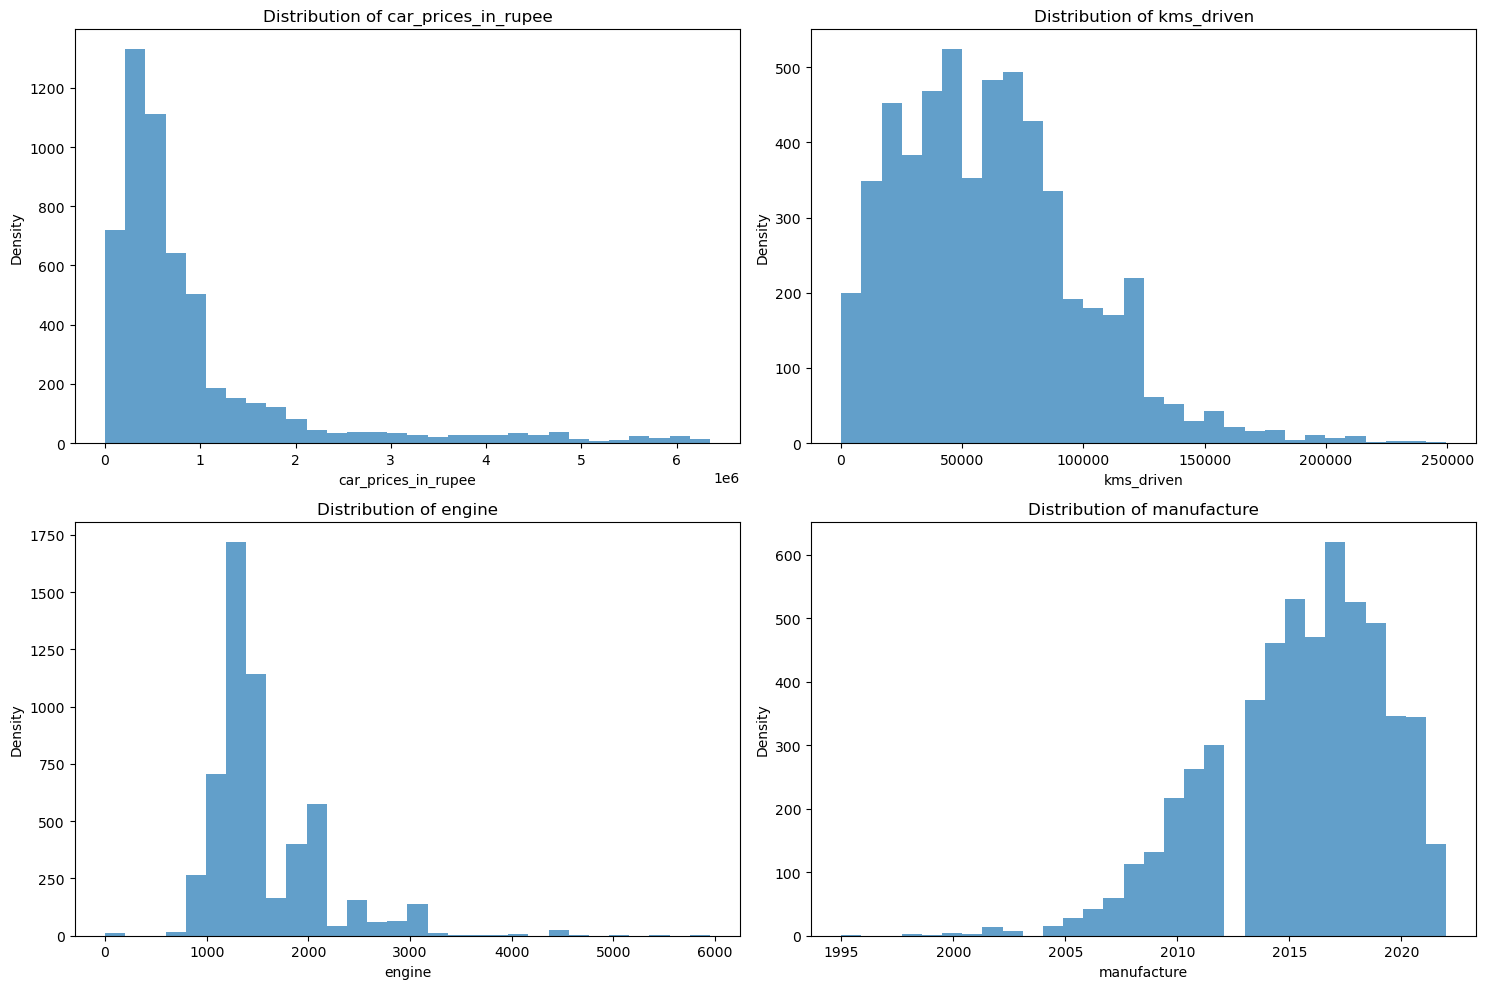

In [155]:
# Plotting the distribution of the data

def plot_distribution(df, columns):
    num_cols = len(columns)
    num_rows = (num_cols // 2) + (num_cols % 2)
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        ax = axes[i]
        ax.hist(df[col], bins=30, alpha=0.7)
        ax.set_title(f'Distribution of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Density')

    plt.tight_layout()
    plt.show()

# Usage example
plot_distribution(df, ['car_prices_in_rupee', 'kms_driven', 'engine','manufacture'])


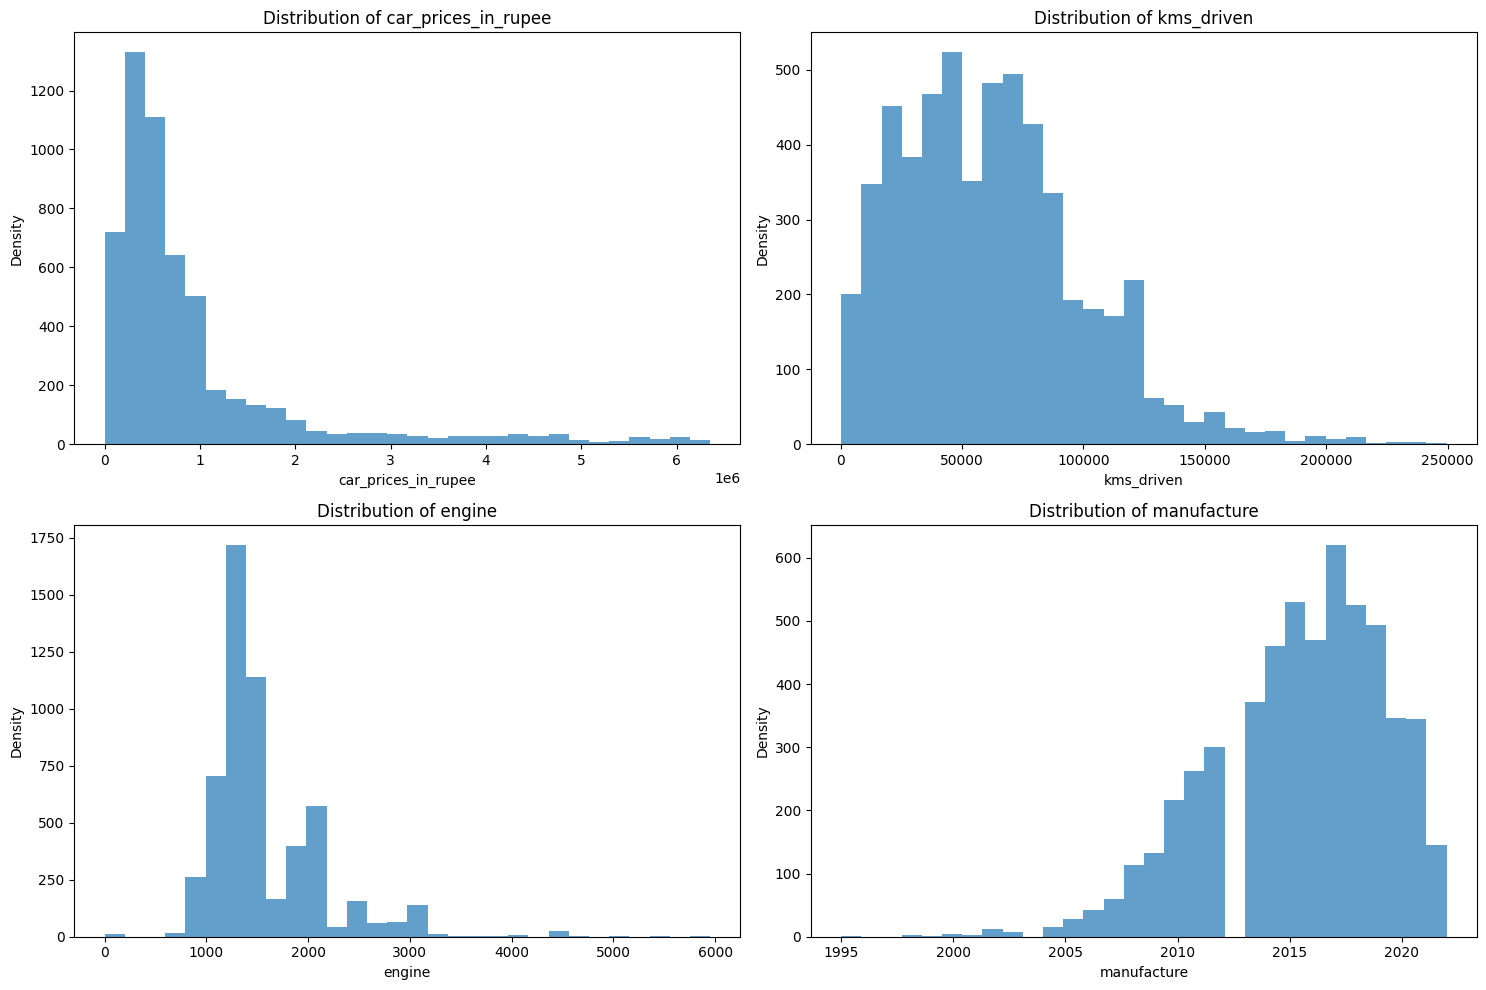

In [15]:
# Usage example
import used_car_prediction_lib.data_exploration.graphicsExplorer as grpExp
distributionPlot_grpExp = grpExp.DistributionGraphicsExplorer()
distributionPlot_grpExp.plot(df, ['car_prices_in_rupee', 'kms_driven', 'engine','manufacture'])

# Data Transformation - features application

In [156]:
# normalization, standardization, log ttansformation
def scaling_normalization(df, column_name:str):
    df[column_name] = (df[column_name] - df[column_name].min()) / (df[column_name].max() - df[column_name].min())
    return df

def scaling_standardization(df, column_name:str):
    df[column_name] = (df[column_name] - df[column_name].mean()) / df[column_name].std()
    return df

def log_transformation(df, column_name:str):
    df[column_name] = np.log(df[column_name])
    return df

#square transformation
def square_transformation(df, column_name:str):
    df[column_name] = np.square(df[column_name])
    return df

#example transforamtions
#df = log_transformation(df, 'car_prices_in_rupee')
#df = log_transformation(df, 'kms_driven')
#df = scaling_normalization(df, 'engine')
#df = scaling_normalization(df, 'manufacture')

# Usage example
test_normality(df['car_prices_in_rupee'], 'car_prices_in_rupee')
test_normality(df['kms_driven'], 'kms_driven')
#test_normality(df['engine'], 'engine')
#test_normality(df['manufacture'], 'manufacture')


Column "car_prices_in_rupee": Statistics=0.656, p=0.000. Column "car_prices_in_rupee" is not normally distributed (reject H0)
Column "kms_driven": Statistics=0.954, p=0.000. Column "kms_driven" is not normally distributed (reject H0)


In [16]:
'''
#example transforamtions
import used_car_prediction_lib.features.transformator as trsfrm

#define class: transformator
normalization_trsfrm = trsfrm.normalization_Transformator()
standardization_trsfrm = trsfrm.standardization_Transformator()
log_trsfrm = trsfrm.Log_Transformator()
square_trsfrm = trsfrm.Square_Transformator()
square_trsfrm.transform(df,'example')

df = log_trsfrm.transform(df, 'car_prices_in_rupee')
df = log_trsfrm.transform(df, 'kms_driven')


df = normalization_trsfrm.transform(df, 'engine')
df = standardization_trsfrm.transform(df, 'engine')

df = normalization_trsfrm.transform(df, 'manufacture')
df = standardization_trsfrm.transform(df, 'manufacture')
'''

# Usage example
import used_car_prediction_lib.data_exploration.dataExplorer as dataExp
normality_dataExp = dataExp.NormalityDataExplorer(alpha=0.05)
normality_dataExp.check(df['car_prices_in_rupee'], 'car_prices_in_rupee')
normality_dataExp.check(df['kms_driven'], 'kms_driven')
#normality_dataExp.check(df['engine'], 'engine')
#normality_dataExp.check(df['manufacture'], 'manufacture')


Column "car_prices_in_rupee": Statistics=0.656, p=0.000. Column "car_prices_in_rupee" is not normally distributed (reject H0)
Column "kms_driven": Statistics=0.954, p=0.000. Column "kms_driven" is not normally distributed (reject H0)


In [157]:
#missing values
detect_missing_values(df)

car_prices_in_rupee       0
kms_driven                0
transmission              0
manufacture               0
engine                    0
Seats                     0
num_owners                0
fuel_type_Diesel          0
fuel_type_Electric        0
fuel_type_Lpg             0
fuel_type_Petrol          0
car_name_BMW              0
car_name_Bentley          0
car_name_Chevrolet        0
car_name_Datsun           0
car_name_Fiat             0
car_name_Force            0
car_name_Ford             0
car_name_Honda            0
car_name_Hyundai          0
car_name_Isuzu            0
car_name_Jaguar           0
car_name_Jeep             0
car_name_Kia              0
car_name_Land             0
car_name_Lexus            0
car_name_MG               0
car_name_Mahindra         0
car_name_Maruti           0
car_name_Maserati         0
car_name_Mercedes-Benz    0
car_name_Mini             0
car_name_Mitsubishi       0
car_name_Nissan           0
car_name_Porsche          0
car_name_Premier    

In [17]:
detectMissingValue_dataExp.check(df)

car_prices_in_rupee       0
kms_driven                0
transmission              0
manufacture               0
engine                    0
Seats                     0
num_owners                0
fuel_type_Diesel          0
fuel_type_Electric        0
fuel_type_Lpg             0
fuel_type_Petrol          0
car_name_BMW              0
car_name_Bentley          0
car_name_Chevrolet        0
car_name_Datsun           0
car_name_Fiat             0
car_name_Force            0
car_name_Ford             0
car_name_Honda            0
car_name_Hyundai          0
car_name_Isuzu            0
car_name_Jaguar           0
car_name_Jeep             0
car_name_Kia              0
car_name_Land             0
car_name_Lexus            0
car_name_MG               0
car_name_Mahindra         0
car_name_Maruti           0
car_name_Maserati         0
car_name_Mercedes-Benz    0
car_name_Mini             0
car_name_Mitsubishi       0
car_name_Nissan           0
car_name_Porsche          0
car_name_Premier    

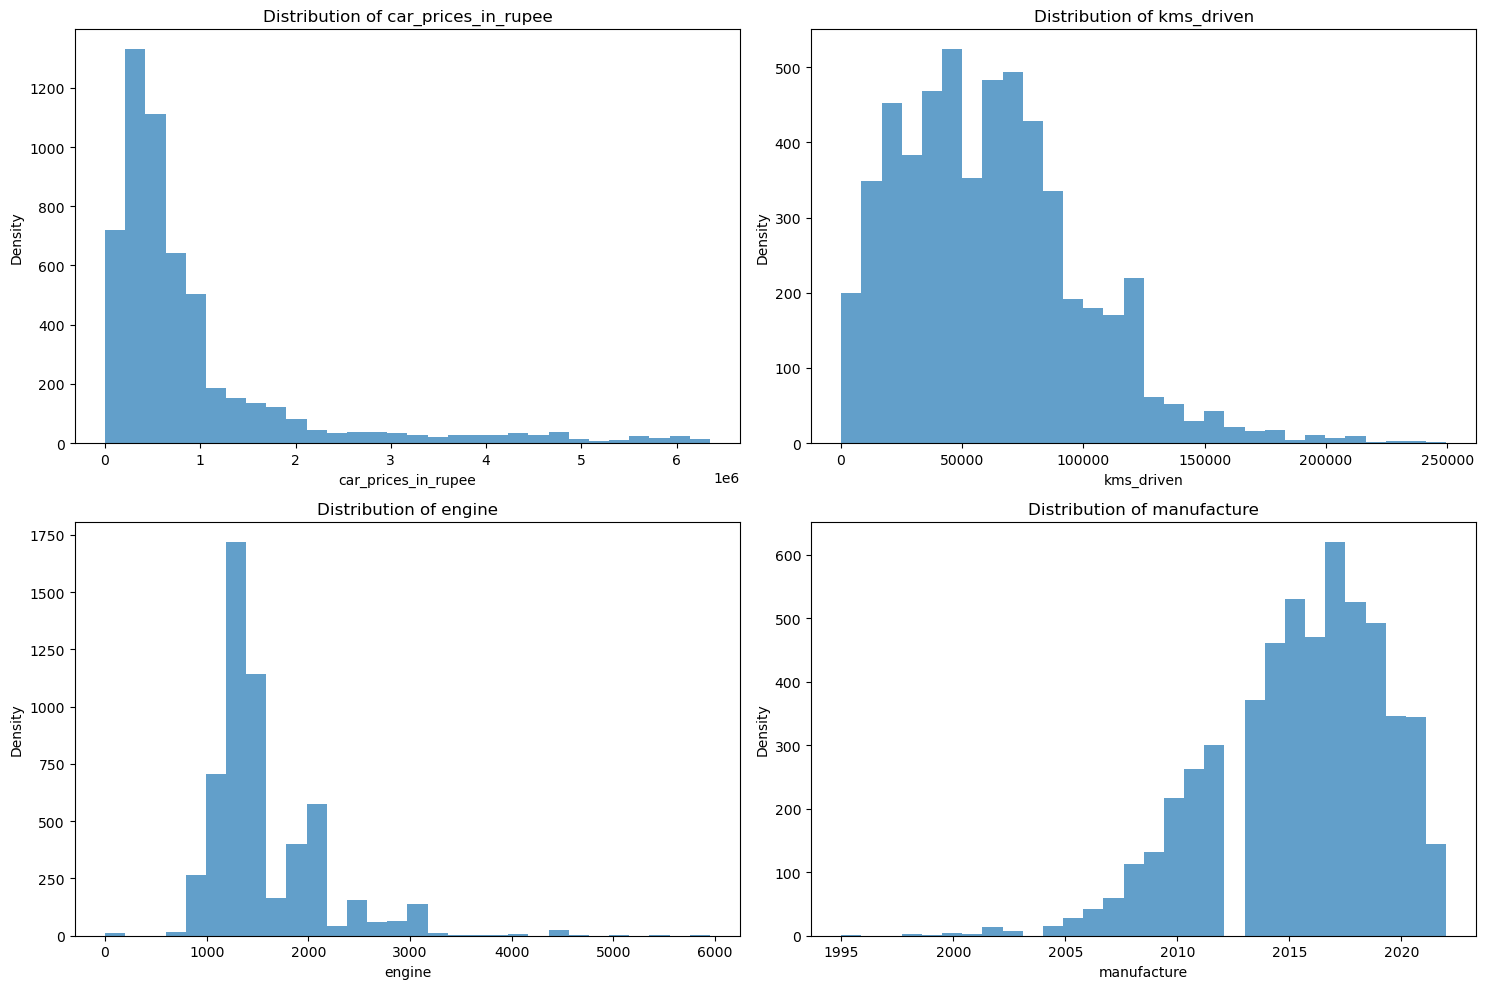

In [158]:
# Usage example
plot_distribution(df, ['car_prices_in_rupee', 'kms_driven', 'engine','manufacture'])

In [159]:
df.head()

,car_prices_in_rupee,kms_driven,transmission,manufacture,engine,Seats,num_owners,fuel_type_Diesel,fuel_type_Electric,fuel_type_Lpg,...,car_name_Mitsubishi,car_name_Nissan,car_name_Porsche,car_name_Premier,car_name_Renault,car_name_Skoda,car_name_Tata,car_name_Toyota,car_name_Volkswagen,car_name_Volvo
0,1003000.0,86226.0,0,2017,1956.0,5,1.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1283000.0,13248.0,1,2021,1330.0,5,1.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1640000.0,60343.0,1,2016,2494.0,5,1.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,777000.0,26696.0,1,2018,1199.0,5,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,515000.0,69414.0,0,2016,1199.0,5,1.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


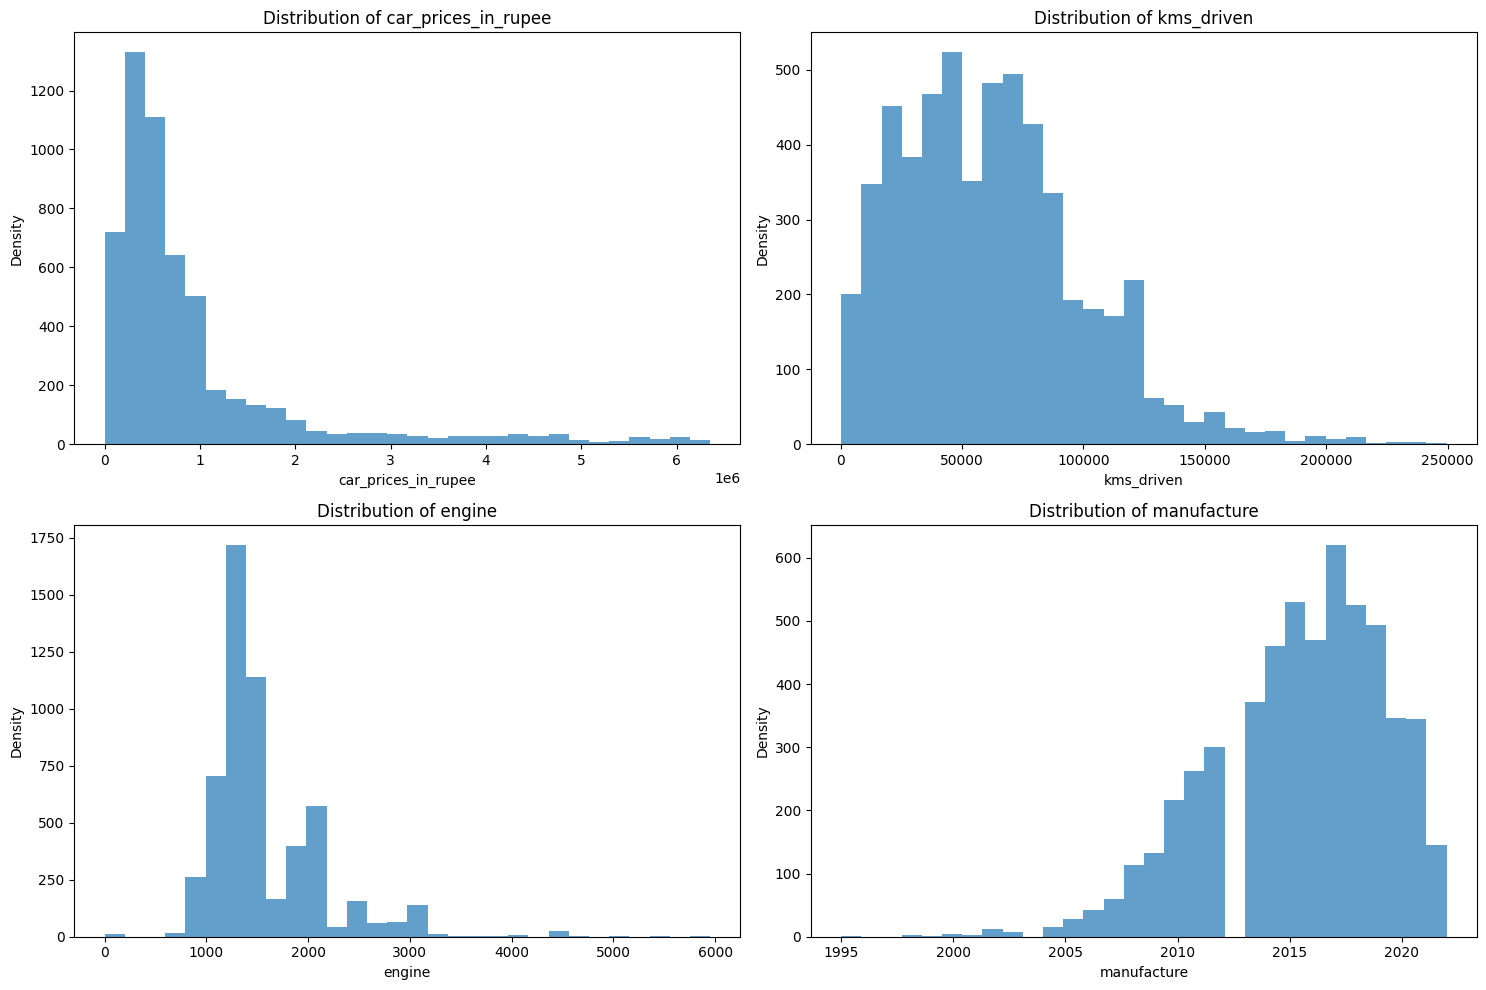

,car_prices_in_rupee,kms_driven,transmission,manufacture,engine,Seats,num_owners,fuel_type_Diesel,fuel_type_Electric,fuel_type_Lpg,...,car_name_Mitsubishi,car_name_Nissan,car_name_Porsche,car_name_Premier,car_name_Renault,car_name_Skoda,car_name_Tata,car_name_Toyota,car_name_Volkswagen,car_name_Volvo
0,1003000.0,86226.0,0,2017,1956.0,5,1.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1283000.0,13248.0,1,2021,1330.0,5,1.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1640000.0,60343.0,1,2016,2494.0,5,1.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,777000.0,26696.0,1,2018,1199.0,5,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,515000.0,69414.0,0,2016,1199.0,5,1.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
distributionPlot_grpExp.plot(df, ['car_prices_in_rupee', 'kms_driven', 'engine','manufacture'])
df.head()

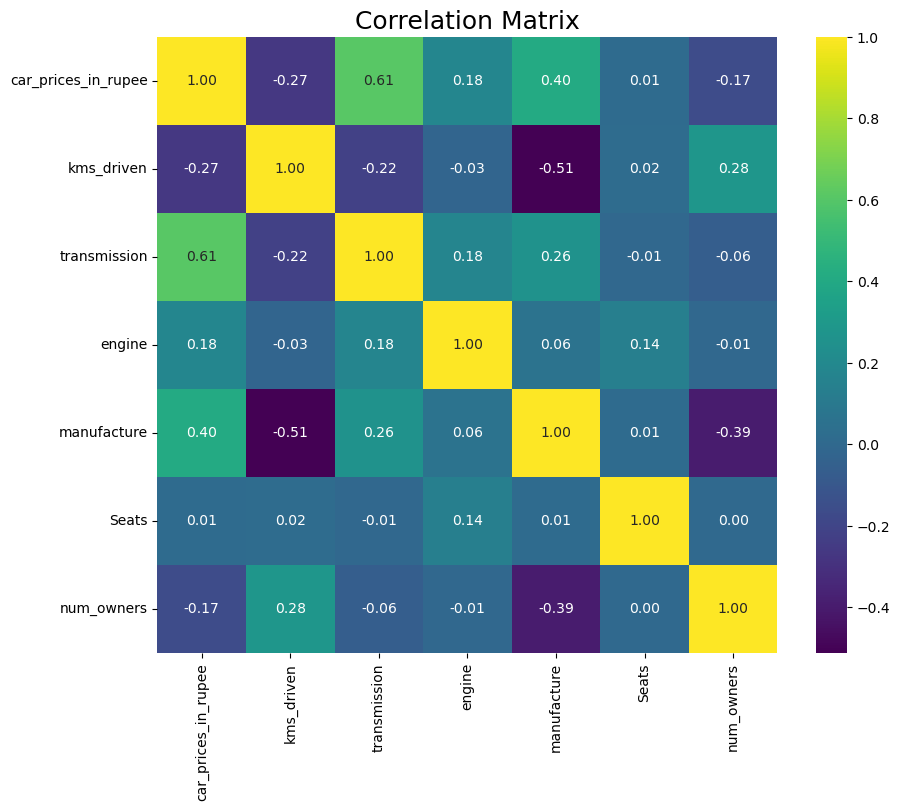

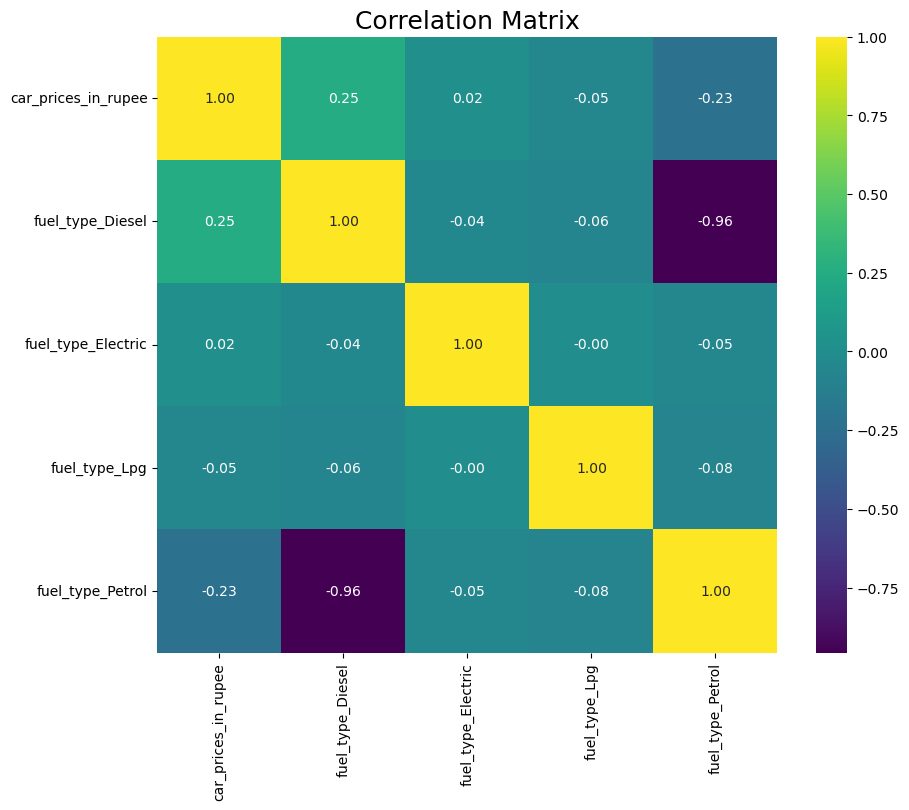

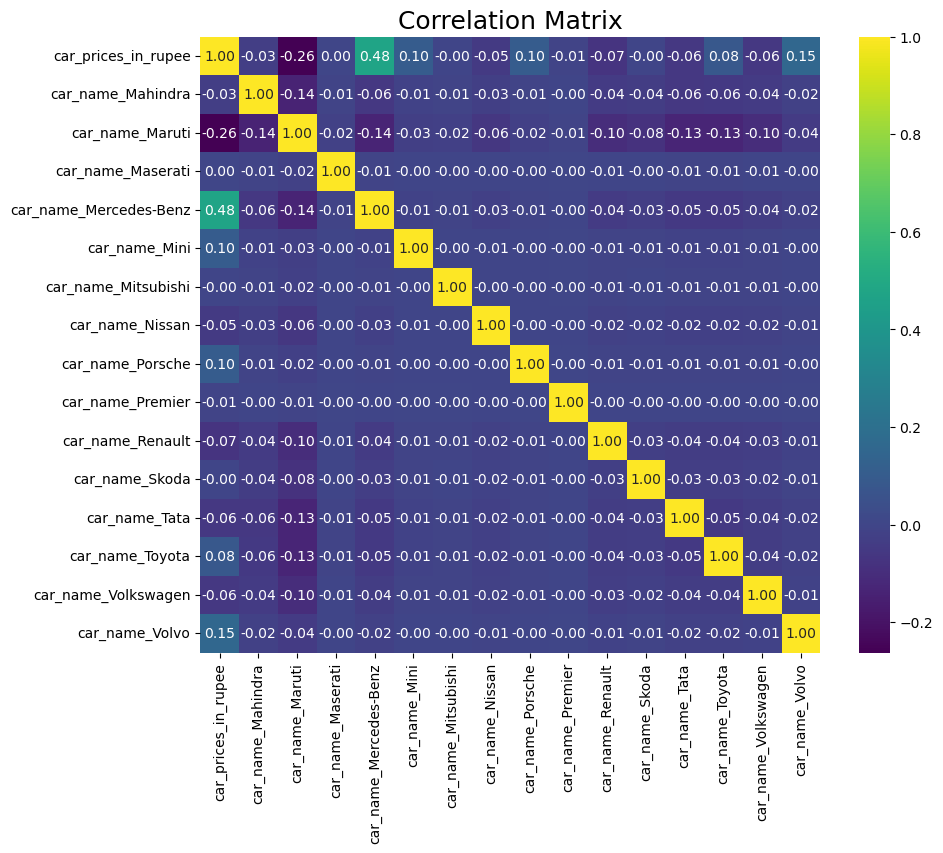

In [160]:
# Correlation Matrix
def correlation_heatmap(df, columns):
    corr = df[columns].corr()
    plt.figure(figsize=(10, 8))
    heatmap = sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f")
    heatmap.set_title('Correlation Matrix', fontdict={'fontsize': 18})
    plt.show()

# Example with numerical variable
correlation_heatmap(df, ['car_prices_in_rupee', 'kms_driven','transmission','engine','manufacture','Seats','num_owners'])

# Fuel type
fuel_types_columns = ['car_prices_in_rupee','fuel_type_Diesel', 'fuel_type_Electric','fuel_type_Lpg','fuel_type_Petrol']
correlation_heatmap(df, fuel_types_columns)

#Car Company
first_column = df.columns[0]  # Get the first column name
last_15_columns = df.columns[-15:].tolist()  # Get the last 15 column names
columns_for_heatmap = [first_column] + last_15_columns  # Combine the first column with the last 15 columns
correlation_heatmap(df, columns_for_heatmap)


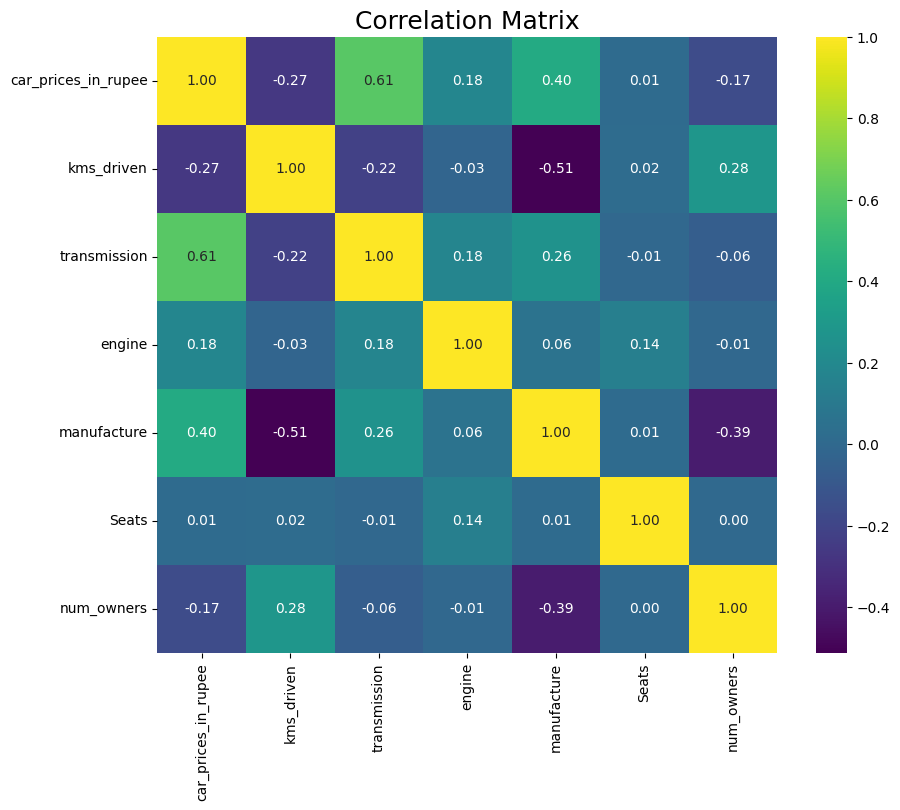

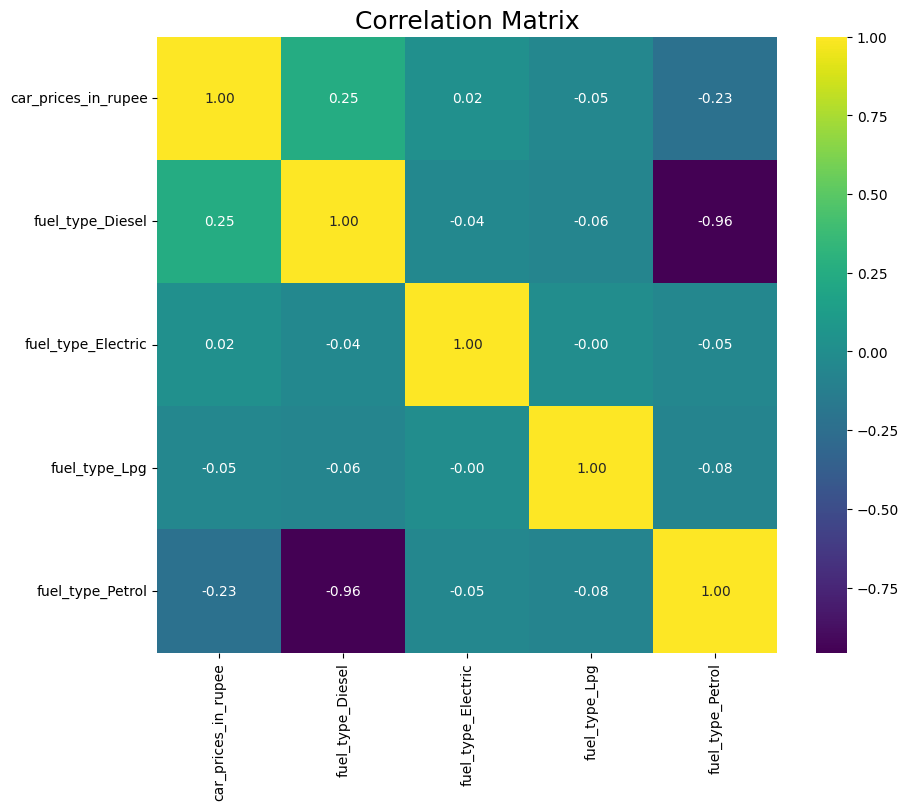

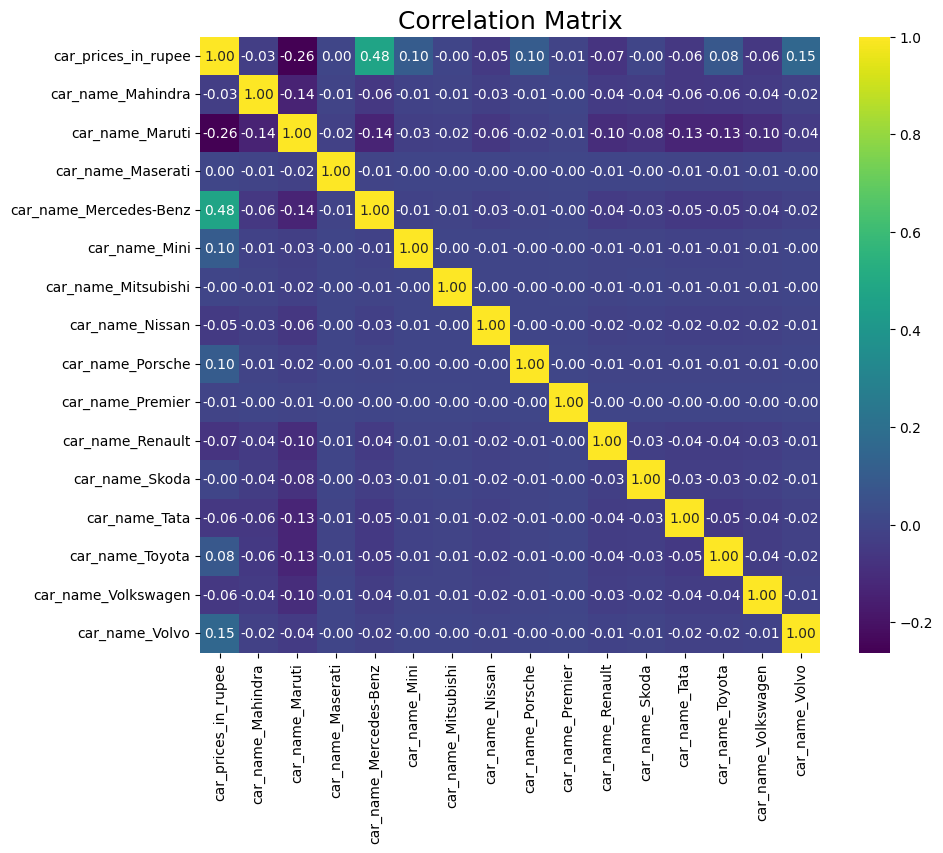

In [19]:
# Correlation Matrix
def correlation_heatmap(df, columns):
    corr = df[columns].corr()
    plt.figure(figsize=(10, 8))
    heatmap = sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f")
    heatmap.set_title('Correlation Matrix', fontdict={'fontsize': 18})
    plt.show()

# Example with numerical variable
import used_car_prediction_lib.data_exploration.graphicsExplorer as grpExp

CorrelationMatrix_grpExp = grpExp.CorrelationMatrixGraphicsExplorer()
CorrelationMatrix_grpExp.plot(df, ['car_prices_in_rupee', 'kms_driven','transmission','engine','manufacture','Seats','num_owners'])

# Fuel type
fuel_types_columns = ['car_prices_in_rupee','fuel_type_Diesel', 'fuel_type_Electric','fuel_type_Lpg','fuel_type_Petrol']
CorrelationMatrix_grpExp.plot(df, fuel_types_columns)

#Car Company
first_column = df.columns[0]  # Get the first column name
last_15_columns = df.columns[-15:].tolist()  # Get the last 15 column names
columns_for_heatmap = [first_column] + last_15_columns  # Combine the first column with the last 15 columns
CorrelationMatrix_grpExp.plot(df, columns_for_heatmap)

# Model

In [161]:
print(df.shape)

(5512, 42)


In [20]:
print(df.shape)

(5512, 42)


In [25]:
# Splitting into train and test sets

X = df.drop('car_prices_in_rupee', axis = 1) # Selecting independent features 
y = df['car_prices_in_rupee'] # Selecting target variable

#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [163]:
print(X_test.shape)

(1654, 41)


In [22]:
# Splitting into train and test sets

X = df.drop('car_prices_in_rupee', axis = 1) # Selecting independent features 
y = df['car_prices_in_rupee'] # Selecting target variable


X_train, X_test, y_train, y_test =reader.split_df(X, y, test_size=0.3, random_state=123)
print(X_test.shape)

(1654, 41)


In [181]:
# Linear Regression
def linear_regression(X_train, y_train, X_test, y_test):
    linear = LinearRegression()
    linear.fit(X_train, y_train)
    y_pred = linear.predict(X_test)
    
    # Calculate accuracy
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mse_std = np.std(y_test - y_pred)
    r2 = r2_score(y_test, y_pred)   
    return mse, rmse, mse_std, r2, y_pred

#Lasso Regression
def lasso_regression(X_train, y_train, X_test, y_test, alphas=[0,1,2,3,4,5]):
    lasso = Lasso(alpha=alphas)
    lasso.fit(X_train, y_train)
    
    y_pred = lasso.predict(X_test)
        
    #Calculate accuracy
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mse_std = np.std(y_test - y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, rmse, mse_std, r2, y_pred

#Lasso Regression with Cross Validation
def lasso_regression_cv(X_train, y_train, X_test, y_test, cv=10):
    alphas = np.logspace(-4, 4, 100)  # Define a range of alpha values for optimization
    
    lasso_cv = LassoCV(alphas=alphas, cv=cv)
    lasso_cv.fit(X_train, y_train)
    
    best_alpha = lasso_cv.alpha_  # Get the optimized alpha
    
    # Train Lasso regression with the best alpha
    lasso = Lasso(alpha=best_alpha)
    lasso.fit(X_train, y_train)
    
    y_pred = lasso.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mse_std = np.std(y_test - y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, rmse, y_pred , r2, best_alpha

#Lasso Regression
def ridge_regression(X_train, y_train, X_test, y_test, alphas=[0.01,0.5,0.75,1,2]):
    ridge = Ridge(alpha=alphas)
    ridge.fit(X_train, y_train)
    
    y_pred = ridge.predict(X_test)
        
    #Calculate accuracy
    mse = mean_squared_error(y_test, y_pred)
    mse_std = np.std(y_test - y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, mse_std, r2, y_pred

#Ridge Regression with Cross Validation
def ridge_regression_cv(X_train, y_train, X_test,y_test, cv=10):
    alphas = np.logspace(-4, 4, 100)  # Define a range of alpha values for optimization
    
    ridge_cv = RidgeCV(alphas=alphas, cv=cv)
    ridge_cv.fit(X_train, y_train)
    
    best_alpha = ridge_cv.alpha_  # Get the optimized alpha
    
    # Train Ridge regression with the best alpha
    ridge = Ridge(alpha=best_alpha)
    ridge.fit(X_train, y_train)
    
    y_pred = ridge.predict(X_test)
    
    #Calculate accuracy
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mse_std = np.std(y_test - y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, rmse, y_pred, r2, best_alpha

# Gradient Boosting Regression
def gradient_boosting(X_train, y_train, X_test, y_test, n_estimators=100, learning_rate=0.1, max_depth=4):
    gb_regressor = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
    gb_regressor.fit(X_train, y_train)
    
    y_pred = gb_regressor.predict(X_test)
    
    #Calculate accuracy
    mse = mean_squared_error(y_test, y_pred)
    mse_std = np.std(y_test - y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, mse_std, r2, y_pred

def gradient_boosting_cv(X_train, y_train, X_test, y_test, cv=10):
    
    print('This process might take a few minutes.')
    param_grid = {
            'n_estimators': [100],
            'learning_rate': [0.05, 0.1],
            'max_depth': [4, 6],
            'min_samples_split': [10, 20],
            'min_samples_leaf': [1,3],
            'subsample': [0.8, 1.0]
        }

    gb_regressor = GradientBoostingRegressor()
    grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
    
    grid_search.fit(X_train, y_train)
    best_gb_model = grid_search.best_estimator_
    
    y_pred = best_gb_model.predict(X_test)
    
    # Calculate accuracy
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mse_std = np.std(y_test - y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Retrieve best parameters
    best_params = grid_search.best_params_
    
    # Store results in a dictionary
    results = {
        'mse': mse,
        'rmse': rmse,
        'mse_std': mse_std,
        'r2': r2,
        'best_params': best_params,
        'y_pred': y_pred
    }
    
    return mse, rmse, y_pred, r2, best_params


In [23]:
import used_car_prediction_lib.model.modelTrainer as modSlc
linearRegression_trMod = modSlc.Linear_Regression_ModelTrainer()
lassoRegression_trMod = modSlc.Lasso_Regression_ModelTrainer(alphas=[0, 1, 2, 3, 4, 5])
ridgeRegression_trMod = modSlc.Ridge_Regression_ModelTrainer(alphas=[0.01, 0.5, 0.75, 1, 2])

'''
linearRegression_trMod.train(X_train, y_train, X_test, y_test)
lassoRegression_trMod.train(X_train, y_train, X_test, y_test)
ridgeRegression_trMod.train(X_train, y_train, X_test, y_test)'''

import used_car_prediction_lib.model.modelCrossValidator as modCV
Lasso_Regression_modCV = modCV.Lasso_Regression_ModelCrossValidator(cv = 10)
Ridge_Regression_modCV = modCV.Ridge_Regression_ModelCrossValidator(cv = 10)
Gradient_Boosting_Regression_modCV = modCV.Gradient_Boosting_Regression_ModelCrossValidator(cv = 10)

'''
Lasso_Regression_modCV.train_validate(X_train, y_train, X_test, y_test)
Ridge_Regression_modCV.train_validate(X_train, y_train, X_test, y_test)
Gradient_Boosting_Regression_modCV.train_validate(X_train, y_train, X_test, y_test)'''

'\nLasso_Regression_modCV.train_validate(X_train, y_train, X_test, y_test)\nRidge_Regression_modCV.train_validate(X_train, y_train, X_test, y_test)\nGradient_Boosting_Regression_modCV.train_validate(X_train, y_train, X_test, y_test)'

# Fine tuning functions


# Running every model

In [182]:
# Function that runs every model

def best_model(X_train, y_train, X_test, y_test):
    # Linear Regression
    linear_mse, linear_rmse,_, linear_r2, _ = linear_regression(X_train, y_train, X_test, y_test)
    print(f"Linear Regression MSE: {linear_mse:.3f} and RMSE:{linear_mse:.3f}  with an R2 of {linear_r2:.3f}")
    
    # Lasso Model
    #lasso_mse, _, _, _ = lasso_regression(X_train, y_train, X_test, y_test,alpha_lasso)
    #print(f"Lasso Model MSE: {lasso_mse}")
    
    # Lasso_cv Model
    lasso_cv_mse, lasso_cv_rmse, y_pred, lasso_cv_r2, best_alpha= lasso_regression_cv(X_train, y_train, X_test, y_test)
    print(f"Lasso Model with Cross Validation MSE: {lasso_cv_mse:.3f} and RMSE:{lasso_cv_rmse:.3f} with an R2 of {lasso_cv_r2:.3f} (alpha={best_alpha:.3f})")
    
    # Ridge Model
    #ridge_mse, _, _, _ = ridge_regression(X_train, y_train, X_test, y_test,alpha_ridge)
    #print(f"Ridge Model MSE: {ridge_mse}")
    
    # Ridge_cv Model
    ridge_cv_mse, ridge_cv_rmse,y_pred, ridge_cv_r2, best_alpha = ridge_regression_cv(X_train, y_train, X_test, y_test)
    print(f"Ridge Model with Cross Validation MSE: {ridge_cv_mse:.3f} and RMSE:{ridge_cv_rmse:.3f} with an R2 of {ridge_cv_r2:.3f} (alpha={best_alpha:.3f}))")
    
    # Gboost Model
    #gboost_mse, _, _, _ = gradient_boosting(X_train, y_train, X_test, y_test)
    #print(f"Gradient Boosting Model MSE: {gboost_mse}")
    
    # Gboost Model CV
    gboost_cv_mse, gboost_cv_rmse, y_pred, gboost_cv_r2, best_params = gradient_boosting_cv(X_train, y_train, X_test, y_test)
    print(f"Gradient Boosting Model with Cross Validation MSE: {gboost_cv_mse:.3f} and RMSE:{gboost_cv_rmse:.3f} with an R2 of {gboost_cv_r2:.3f} (hyperparamaters: {best_params}))")
    
    # Find the best model based on MSE
    #min_mse = min(linear_mse, poly_mse, lasso_mse,lasso__cv_mse,  ridge_mse, ridge_cv_mse, gboost_mse,gboost_cv_mse)
    min_mse = min(linear_mse,lasso_cv_mse,  ridge_cv_mse,gboost_cv_mse)
    min_rmse = min(linear_rmse, lasso_cv_rmse,  ridge_cv_rmse, gboost_cv_rmse)
    min_r2 = min(linear_r2, lasso_cv_r2,  ridge_cv_r2, gboost_cv_r2)

    if min_mse == linear_mse:
        best_model = 'Linear Regression'
        min_rmse = linear_rmse
        min_r2 = linear_r2
    #elif min_mse == lasso_mse:
    #    best_model = 'Lasso'
    elif min_mse == lasso_cv_mse:
        best_model = 'Lasso'
        min_rmse = lasso_cv_rmse
        min_r2 = lasso_cv_r2
    #elif min_mse == ridge_mse:
    #    best_model = 'Ridge'
    elif min_mse == ridge_cv_mse:
        best_model = 'Ridge'
        min_rmse = ridge_cv_rmse
        min_r2 = ridge_cv_r2
    #elif min_mse == gboost_mse:
    #    best_model = 'Gradient Boosting'
    elif min_mse == gboost_cv_mse:
        best_model = 'Gradient Boosting'
        min_rmse = gboost_cv_rmse
        min_r2 = gboost_cv_r2

    print(f"The best model is: \033[1m\033[3m{best_model} with an MSE of {min_mse:.3f}, RMSE of {min_rmse:.3f} and an R2 of {min_r2:.3f}\033[0m")

    return best_model


In [183]:
best_model = best_model(X_train, y_train, X_test, y_test)

Linear Regression MSE: 442497139407.946 and RMSE:442497139407.946  with an R2 of 0.641
Lasso Model with Cross Validation MSE: 442518703006.899 and RMSE:665220.793 with an R2 of 0.641 (alpha=31.257)
Ridge Model with Cross Validation MSE: 442931371433.803 and RMSE:665530.894 with an R2 of 0.641 (alpha=0.521))
This process might take a few minutes.
Fitting 10 folds for each of 32 candidates, totalling 320 fits
Gradient Boosting Model with Cross Validation MSE: 239908437924.108 and RMSE:489804.489 with an R2 of 0.805 (hyperparamaters: {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.8}))
The best model is: Gradient Boosting with an MSE of 239908437924.108, RMSE of 489804.489 and an R2 of 0.805


In [24]:
import used_car_prediction_lib.model.modelSelector as modSlc
modelSelector =  modSlc.ModelSelector()

modelSelector.select_best_model(X_train, y_train, X_test, y_test)

Linear Regression MSE: 442497139407.946 and RMSE:442497139407.946  with an R2 of 0.641
Lasso Model with Cross Validation MSE: 442518703006.900 and RMSE:665220.793 with an R2 of 0.641 (alpha=31.257)


c:\Users\surface\DSDM\Data source\semester1\ML\Used_Car_Predictor\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.98892e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\surface\DSDM\Data source\semester1\ML\Used_Car_Predictor\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.98119e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\surface\DSDM\Data source\semester1\ML\Used_Car_Predictor\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.99153e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\surface\DSDM\Data source\semester1\ML\Used_Car_Predictor\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (r

Ridge Model with Cross Validation MSE: 442931371433.806 and RMSE:665530.894 with an R2 of 0.641 (alpha=0.521))
This process might take a few minutes.
Fitting 10 folds for each of 32 candidates, totalling 320 fits
Gradient Boosting Model with Cross Validation MSE: 229745857821.081 and RMSE:479318.118 with an R2 of 0.814 (hyperparamaters: {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.8}))
The best model is: Gradient Boosting with an MSE of 229745857821.081, RMSE of 479318.118 and an R2 of 0.814


'Gradient Boosting'